<a href="https://colab.research.google.com/github/AramMohammed1/ResumeClassifactionNLP/blob/Spacy-Dependency-Tree-NER/Spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#VPN Needed
nltk.download("stopwords")
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from nltk import word_tokenize
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize
!pip install stanza
import stanza
from sklearn.model_selection import GridSearchCV
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from nltk import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 38.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Mhammad Nour - Aram/Dataset/Resume.csv')
df = df.drop(['ID','Resume_html'],axis=1)
df = df.rename(columns={'Resume_str': 'Resume'})

df.head()

,Resume,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [4]:
!pip install spacy
!python -m spacy download en_core_web_sm  # Small model, works well for general purposes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#Dependency Tree


In [ ]:
import spacy

# Load the pre-trained English model from spaCy
nlp = spacy.load('en_core_web_sm')

# Function to process sentences and extract dependency tree
def SpacyDependencyTree(resume_text):
    results = []
    doc = nlp(resume_text)
    for token in doc:
        head_word = token.head.text if token.head != token else "root"
        word_info = {
            'id': token.i + 1,  # ID is index + 1 (spaCy uses 0-based indexing)
            'word': token.text,
            'head_id': token.head.i + 1,  # Head token's index + 1
            'head': head_word,
            'deprel': token.dep_
        }
        results.append(word_info)
    return results


In [ ]:
# Process each resume in the dataframe
for i in range(len(df['Resume'])):
    df['Resume'][i] = process_sentences(df['Resume'][i])

In [ ]:
df.head()

In [ ]:
df.to_csv('/content/drive/MyDrive/Mhammad Nour - Aram/NLP/Level_2_Dependency_Tree_Spacy.csv', index=False)
df.to_pickle('/content/drive/MyDrive/Mhammad Nour - Aram/NLP/Level_2_Dependency_Tree_Spacy.pkl')

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/Mhammad Nour - Aram/NLP/Level_2_Dependency_Tree_Spacy.pkl')


# NER

In [ ]:
import spacy
import pandas as pd

# Load the pre-trained English model from spaCy
nlp = spacy.load('en_core_web_sm')

# Function to process sentences and extract named entities
def er_process_sentences(resume_text):
    results = []
    doc = nlp(resume_text)
    for ent in doc.ents:
        ent_info = {
            'word': ent.text,
            'type': ent.label_
        }
        results.append(ent_info)
    return results

In [ ]:

# Process each resume in the dataframe
for i in range(len(df['Resume'])):
    df['Resume'][i] = er_process_sentences(df['Resume'][i])


In [ ]:
df.head()

,Resume,Category
0,"[{'word': '15+ years', 'type': 'DATE'}, {'word...",HR
1,"[{'word': 'SPECIALIST', 'type': 'ORG'}, {'word...",HR
2,"[{'word': '20 years', 'type': 'DATE'}, {'word'...",HR
3,"[{'word': 'Driven', 'type': 'PERSON'}, {'word'...",HR
4,"[{'word': 'Skill Highlights ', 'type...",HR


In [ ]:
df.to_csv('/content/drive/MyDrive/Mhammad Nour - Aram/NLP/Level_2_NER_Spacy.csv', index=False)
df.to_pickle('/content/drive/MyDrive/Mhammad Nour - Aram/NLP/Level_2_NER_Spacy.pkl')

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Mhammad Nour - Aram/NLP/Level_2_NER_Spacy.pkl')


In [ ]:
df['Organizations'] = df['Resume'].apply(lambda entities: [ent['word'] for ent in entities if ent['type'] == 'ORG'])
df.head()

,Resume,Category,Organizations
0,"[{'word': '15+ years', 'type': 'DATE'}, {'word...",HR,"[Customer Service Management, Team, IHG, Custo..."
1,"[{'word': 'SPECIALIST', 'type': 'ORG'}, {'word...",HR,"[SPECIALIST, Communications, Marketing, Human ..."
2,"[{'word': '20 years', 'type': 'DATE'}, {'word'...",HR,"[Human Resources Executive Management, Project..."
3,"[{'word': 'Driven', 'type': 'PERSON'}, {'word'...",HR,"[Skills Type, Microsoft, Access, Outl..."
4,"[{'word': 'Skill Highlights ', 'type...",HR,"[HR Department Startup, ADA/EEO/WC Mediation ..."


In [ ]:
df['Organizations'] = df['Organizations'].apply(lambda orgs: " ".join(["_".join(org.split()) for org in orgs]))

In [ ]:
df.head()

,Resume,Category,Organizations
0,"[{'word': '15+ years', 'type': 'DATE'}, {'word...",HR,Customer_Service_Management Team IHG Customer_...
1,"[{'word': 'SPECIALIST', 'type': 'ORG'}, {'word...",HR,"SPECIALIST Communications,_Marketing,_Human_Re..."
2,"[{'word': '20 years', 'type': 'DATE'}, {'word'...",HR,Human_Resources_Executive_Management Project_M...
3,"[{'word': 'Driven', 'type': 'PERSON'}, {'word'...",HR,"Skills_Type Microsoft Access,_Outlook PowerPoi..."
4,"[{'word': 'Skill Highlights ', 'type...",HR,HR_Department_Startup ADA/EEO/WC_Mediation_&_A...


# Training Based on NER Only

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import warnings

# Prepare the data
requiredText = df['Organizations'].values
requiredTarget = df['Category'].values

# TF-IDF Vectorizer
word_vectorizer_df = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    min_df=0.01,  # Exclude terms in <1% of documents
    max_df=0.7    # Exclude terms in >70% of documents
)
WordFeatures_df = word_vectorizer_df.fit_transform(requiredText)

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Loop through values of k from 0 to 245 with a step of 5
for k in range(5, 246, 5):
    chi2_selector = SelectKBest(chi2, k=k)
    selected_features = chi2_selector.fit_transform(WordFeatures_df, requiredTarget)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        selected_features, requiredTarget, random_state=42, test_size=0.2,
        shuffle=True, stratify=requiredTarget
    )

    # Define the SVC model with RBF kernel
    model = SVC(kernel='rbf', gamma=0.2, C=10)
    clf = OneVsRestClassifier(model)

    # Train the model
    clf.fit(X_train, y_train)

    # Predictions for test set
    test_predictions = clf.predict(X_test)

    # Predictions for training set
    train_predictions = clf.predict(X_train)

    # Store the accuracy scores for both training and test sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Now train_accuracies and test_accuracies will contain the accuracies for each value of k


Train accuracies list has 49 values, but k_values has 50 values. Adjusting accordingly.


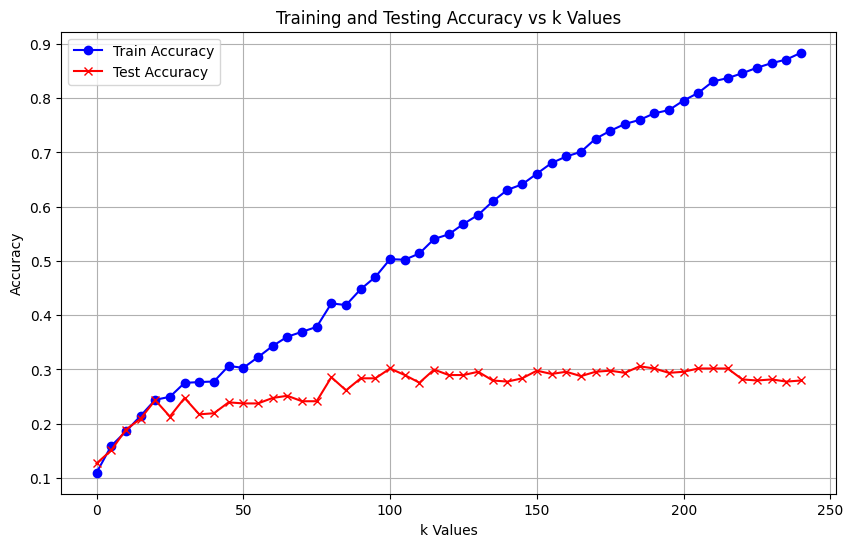

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_accuracies and test_accuracies are already populated
k_values = list(range(0, 250, 5))  # k values from 0 to 245 with a step of 5

# Ensure both lists have the same length
if len(train_accuracies) != len(k_values):
    print(f"Train accuracies list has {len(train_accuracies)} values, but k_values has {len(k_values)} values. Adjusting accordingly.")
    k_values = k_values[:len(train_accuracies)]  # Trim the k_values list to match the accuracy list length

if len(test_accuracies) != len(k_values):
    print(f"Test accuracies list has {len(test_accuracies)} values, but k_values has {len(k_values)} values. Adjusting accordingly.")
    test_accuracies = test_accuracies[:len(k_values)]  # Trim the test accuracies list to match the accuracy list length

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(k_values, train_accuracies, label='Train Accuracy', color='b', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', color='r', marker='x')

plt.xlabel('k Values')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs k Values')

plt.legend()
plt.grid(True)
plt.show()


# Training Based on Dependency Tree Only

In [6]:
df.head()

,Resume,Category
0,"[{'id': 1, 'word': ' ', 'head_id': 2, ...",HR
1,"[{'id': 1, 'word': ' ', 'head_id': 3, ...",HR
2,"[{'id': 1, 'word': ' ', 'head_id': 2, ...",HR
3,"[{'id': 1, 'word': ' ', 'head_id': 2, ...",HR
4,"[{'id': 1, 'word': ' ', 'head_id': 2, ...",HR


In [8]:
import spacy

nlp = spacy.load("en_core_web_sm")



# Function to process sentences and extract features from the dependency tree
def extract_dependency_features(text):
    doc = nlp(text)

    # Prepare a list to hold the extracted features
    extracted_features = []

    # Iterate over each token in the sentence
    for token in doc:
        # Extract the lemmatized word, its POS tag, and its dependency relation with the head
        lemma = token.lemma_  # Lemma (root form)
        head_lemma = token.head.lemma_  # Lemma of the head word (parent)
        feature = f"{lemma}_{head_lemma}"
        extracted_features.append(feature)

        head_token = token.head
        head_of_head = head_token.head if head_token else None

        if head_of_head:
          feature = f"{lemma}_{head_lemma}_{head_of_head.lemma_}"
        extracted_features.append(feature)

        if token.pos_=="NOUN":
          extracted_features.append(lemma)

    # Return the extracted features as a string (concatenated)
    return ' '.join(extracted_features)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [11]:
for i in range(len(df['Resume'])):
    df['Resume'][i] = extract_dependency_features(df['Resume'][i])


<ipython-input-11-9c4b558c8e9e>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Resume'][i] = extract_dependency_features(df['Resume'][i])


In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Mhammad Nour - Aram/NLP/Level_2_Dependency_Tree_Spacy.pkl')

In [12]:
df.head()

,Resume,Category
0,_HR _HR_MARKETING HR_MARKETI...,HR
1,_SPECIALIST _SPECIALIST_SPEC...,HR
2,_hr _hr_experience hr_experi...,HR
3,_hr _hr_hr hr_hr hr_hr_hr hr...,HR
4,_HR _HR_MANAGER HR_MANAGER H...,HR


In [ ]:


# Step 1: Create a dictionary to map each id to its token
id_to_token = {token['id']: token for token in tokens}

# Step 2: Function to get the head of the head for each token
def get_head_of_head(tokens):
    extracted_features = []
    head_heads = []

    for token in tokens:
        head_token = id_to_token.get(token['head_id'])  # Get the head token
        head_of_head = id_to_token.get(head_token['head_id']) if head_token else None  # Get head of head if it exists

        # Create feature string based on token, head, and head's head
        feature = f"{token['word']}_{head_token['word'] if head_token else 'None'}_{head_of_head['word'] if head_of_head else 'None'}"
        extracted_features.append(feature)

    return ' '.join(extracted_features)




In [ ]:
for i in range(len(df['Resume'])):
    df['Resume'][i] = get_head_of_head(df['Resume'][i])


In [ ]:
df.head()

,Resume,Category
0,_HR_MARKETING HR_MARKETING_ASSOCIATE ...,HR
1,_ADMINISTRATOR_MARKETING HR_ADMINISTR...,HR
2,_HR_MARKETING HR_None_None DIRECTOR_H...,HR
3,_HR_MARKETING HR_HR_MARKETING SPECIAL...,HR
4,_HR_MARKETING HR_ADMINISTRATOR_MARKET...,HR


In [ ]:
# Get the results
head_heads = get_head_of_head(tokens)
print(head_heads)


In [ ]:


# Function to process sentences and extract features from the dependency tree
def extract_dependency_features(doc):
    # Prepare a list to hold the extracted features
    extracted_features = []

    # Iterate over each token in the sentence
    for token in doc:
        # Extract the lemmatized word, its POS tag, and its dependency relation with the head
        lemma = token['word']  # Lemma (root form)
        head_lemma =token ['head']
        dep = token['deprel']   # Dependency relation (e.g., 'nsubj' for subject)


        # Append a feature as a string, combining relevant information
        feature = f"{lemma}_{dep}_{head_lemma}"
        extracted_features.append(feature)

    # Return the extracted features as a string (concatenated)
    return ' '.join(extracted_features)


In [ ]:

# Process each resume in the dataframe
for i in range(len(df['Resume'])):
    df['Resume'][i] = extract_dependency_features(df['Resume'][i])


In [ ]:
df.head()

,Resume,Category
0,_dep_HR HR_nmod_MARKETING ADMINISTRAT...,HR
1,_dep_SPECIALIST HR_compound_SPECIALIS...,HR
2,_dep_HR HR_nmod_experience DIRECTOR_a...,HR
3,_dep_HR HR_ROOT_root SPECIALIST_compo...,HR
4,_dep_HR HR_compound_MANAGER MANAGER_c...,HR


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import warnings
# Initialize the dictionaries to store the results
train_accuracy_map = {}
test_accuracy_map = {}

requiredText = df['Resume'].values
requiredTarget = df['Category'].values

# Vectorizer setup
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    min_df=0.01,  # Exclude terms in <1% of documents
    max_df=0.7,    # Exclude terms in >70% of documents
)

word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

# Loop over number of features
for numOfFetures in range(1, 1000, 100):  # Loop from 100 to 1300, stepping by 100
    print("===================rbf with", numOfFetures, "Features ========================")

    # Feature selection using Chi-squared test
    chi2_selector = SelectKBest(chi2, k=numOfFetures)
    WordFeatures_selected = chi2_selector.fit_transform(WordFeatures, requiredTarget)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(WordFeatures_selected, requiredTarget, random_state=42, test_size=0.2,
                                                         shuffle=True, stratify=requiredTarget)
    print(X_train.shape)
    print(X_test.shape)

    warnings.filterwarnings('ignore')

    # SVM model with RBF kernel
    model = SVC(kernel='rbf', gamma=0.2, C=10)
    clf = OneVsRestClassifier(model)
    clf.fit(X_train, y_train)

    # Predictions for test and train sets
    test_predictions = clf.predict(X_test)
    train_predictions = clf.predict(X_train)

    # Test set metrics
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='weighted')
    test_recall = recall_score(y_test, test_predictions, average='weighted')
    test_f1 = f1_score(y_test, test_predictions, average='weighted')

    # Training set metrics
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_precision = precision_score(y_train, train_predictions, average='weighted')
    train_recall = recall_score(y_train, train_predictions, average='weighted')
    train_f1 = f1_score(y_train, train_predictions, average='weighted')

    # Store the results in the dictionaries
    train_accuracy_map[numOfFetures] = train_accuracy
    test_accuracy_map[numOfFetures] = test_accuracy



# Print results for verification
print(f"Train accuracy map: {train_accuracy_map}")
print(f"Test accuracy map: {test_accuracy_map}")


===================rbf with 1 Features ========================
(1987, 1)
(497, 1)
===================rbf with 101 Features ========================
(1987, 101)
(497, 101)
===================rbf with 201 Features ========================
(1987, 201)
(497, 201)
===================rbf with 301 Features ========================
(1987, 301)
(497, 301)
===================rbf with 401 Features ========================
(1987, 401)
(497, 401)
===================rbf with 501 Features ========================
(1987, 501)
(497, 501)
===================rbf with 601 Features ========================
(1987, 601)
(497, 601)
===================rbf with 701 Features ========================
(1987, 701)
(497, 701)
===================rbf with 801 Features ========================
(1987, 801)
(497, 801)
===================rbf with 901 Features ========================
(1987, 901)
(497, 901)
Train accuracy map: {1: 0.04730749874182184, 101: 0.6129843985908404, 201: 0.6864620030196276, 301: 0.71917463512833

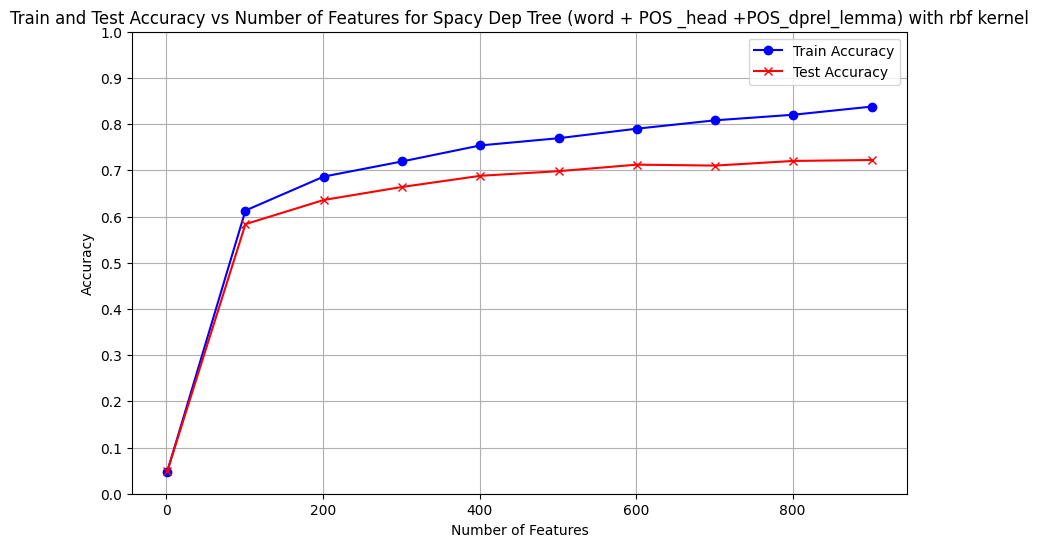

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting train and test accuracy maps by the number of features
sorted_train_word_wordPOS_head_headPOS_deprel_accuracy_map = dict(sorted(train_accuracy_map.items()))
sorted_test_word_wordPOS_head_headPOS_deprel_accuracy_map = dict(sorted(test_accuracy_map.items()))

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the Train Accuracy
plt.plot(sorted_train_word_wordPOS_head_headPOS_deprel_accuracy_map.keys(), sorted_train_word_wordPOS_head_headPOS_deprel_accuracy_map.values(), label='Train Accuracy', color='blue', marker='o')

# Plotting the Test Accuracy
plt.plot(sorted_test_word_wordPOS_head_headPOS_deprel_accuracy_map.keys(), sorted_test_word_wordPOS_head_headPOS_deprel_accuracy_map.values(), label='Test Accuracy', color='red', marker='x')

# Adding titles and labels
plt.title('Train and Test Accuracy vs Number of Features for Spacy Dep Tree (word + POS _head +POS_dprel_lemma) with rbf kernel')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')

# Setting y-axis ticks to have 10 divisions with a step of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

# Adding grid and legend
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


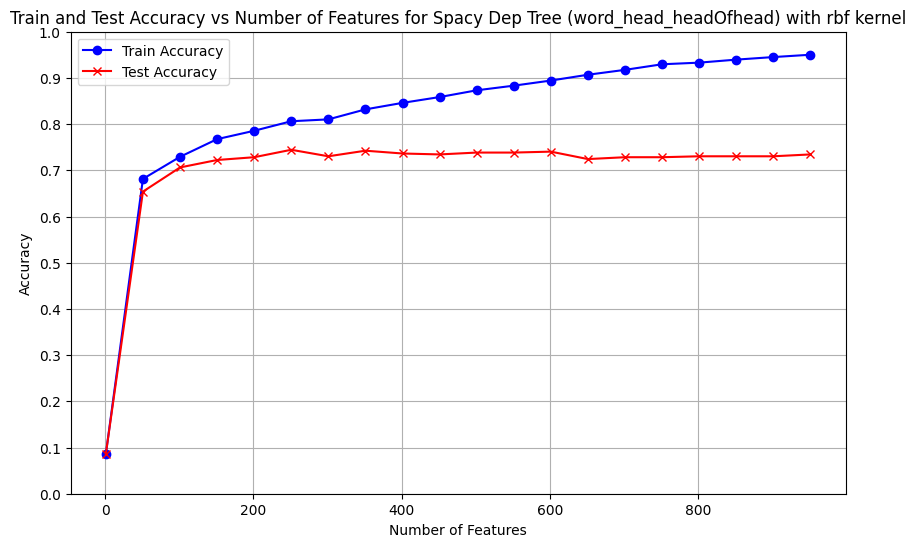

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting train and test accuracy maps by the number of features
sorted_train_word_head_headOfhead_accuracy_map = dict(sorted(train_accuracy_map.items()))
sorted_test_word_head_headOfhead_accuracy_map = dict(sorted(test_accuracy_map.items()))

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the Train Accuracy
plt.plot(sorted_train_word_head_headOfhead_accuracy_map.keys(), sorted_train_word_head_headOfhead_accuracy_map.values(), label='Train Accuracy', color='blue', marker='o')

# Plotting the Test Accuracy
plt.plot(sorted_test_word_head_headOfhead_accuracy_map.keys(), sorted_test_word_head_headOfhead_accuracy_map.values(), label='Test Accuracy', color='red', marker='x')

# Adding titles and labels
plt.title('Train and Test Accuracy vs Number of Features for Spacy Dep Tree (word_head_headOfhead) with rbf kernel')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')

# Setting y-axis ticks to have 10 divisions with a step of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

# Adding grid and legend
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


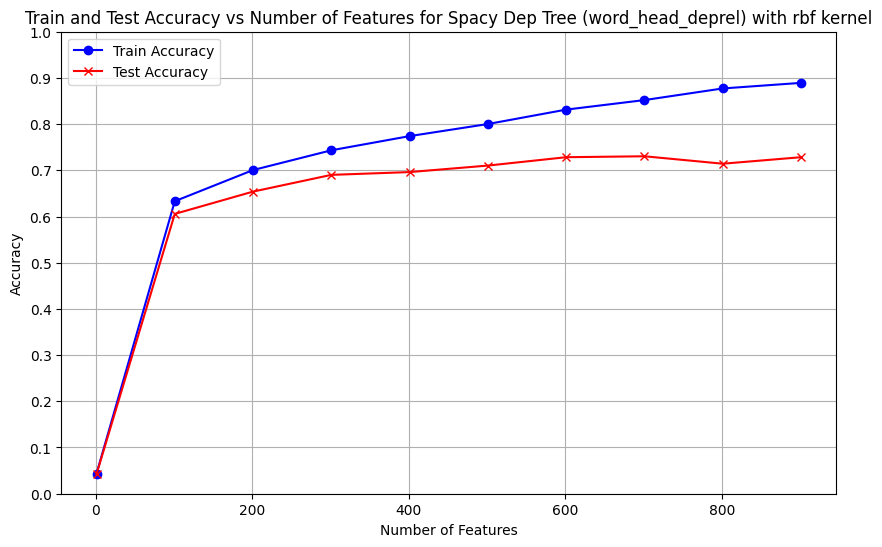

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting train and test accuracy maps by the number of features
sorted_train_word_head_deprel_accuracy_map = dict(sorted(train_accuracy_map.items()))
sorted_test_word_head_deprel_accuracy_map = dict(sorted(test_accuracy_map.items()))

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the Train Accuracy
plt.plot(sorted_train_word_head_deprel_accuracy_map.keys(), sorted_train_word_head_deprel_accuracy_map.values(), label='Train Accuracy', color='blue', marker='o')

# Plotting the Test Accuracy
plt.plot(sorted_test_word_head_deprel_accuracy_map.keys(), sorted_test_word_head_deprel_accuracy_map.values(), label='Test Accuracy', color='red', marker='x')

# Adding titles and labels
plt.title('Train and Test Accuracy vs Number of Features for Spacy Dep Tree (word_head_deprel) with rbf kernel')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')

# Setting y-axis ticks to have 10 divisions with a step of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

# Adding grid and legend
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


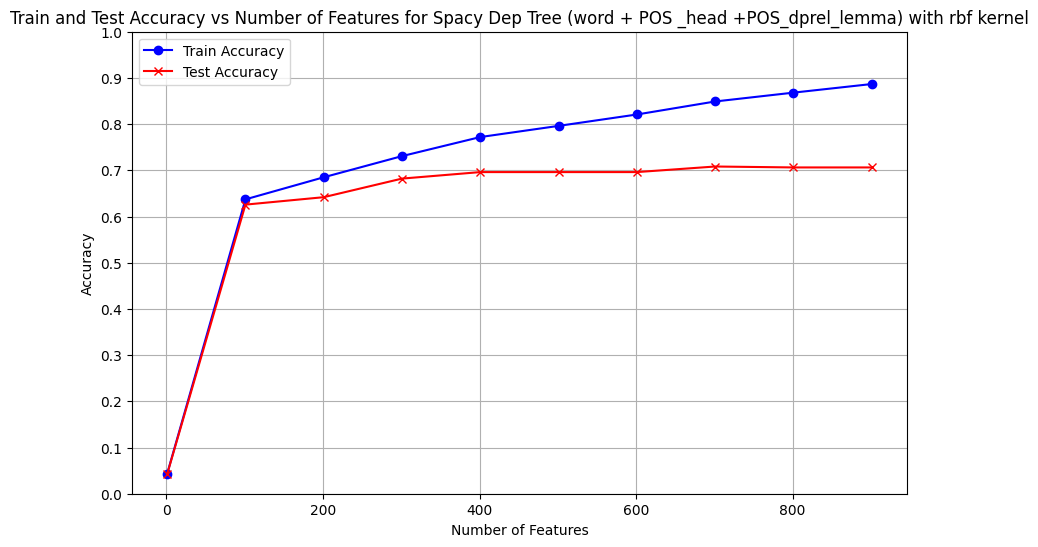

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting train and test accuracy maps by the number of features
sorted_train_word_wordPOS_head_headPOS_deprel_accuracy_map = dict(sorted(train_accuracy_map.items()))
sorted_test_word_wordPOS_head_headPOS_deprel_accuracy_map = dict(sorted(test_accuracy_map.items()))

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the Train Accuracy
plt.plot(sorted_train_word_wordPOS_head_headPOS_deprel_accuracy_map.keys(), sorted_train_word_wordPOS_head_headPOS_deprel_accuracy_map.values(), label='Train Accuracy', color='blue', marker='o')

# Plotting the Test Accuracy
plt.plot(sorted_test_word_wordPOS_head_headPOS_deprel_accuracy_map.keys(), sorted_test_word_wordPOS_head_headPOS_deprel_accuracy_map.values(), label='Test Accuracy', color='red', marker='x')

# Adding titles and labels
plt.title('Train and Test Accuracy vs Number of Features for Spacy Dep Tree (word + POS _head +POS_dprel_lemma) with rbf kernel')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')

# Setting y-axis ticks to have 10 divisions with a step of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

# Adding grid and legend
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
